
Electrical Circuits

l*omega/(I*c*l*omega**2*r + l*omega - I*r)
l*omega/(I*c*l*omega**2*r + l*omega - I*r)


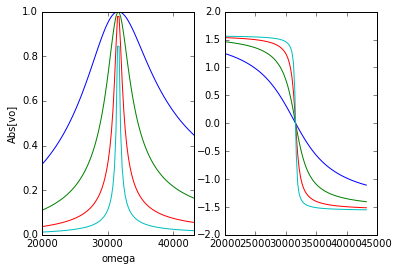

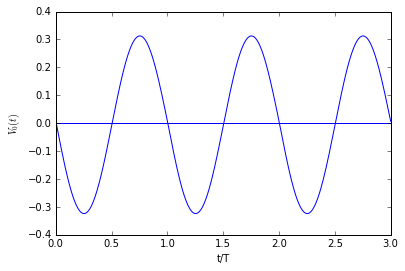

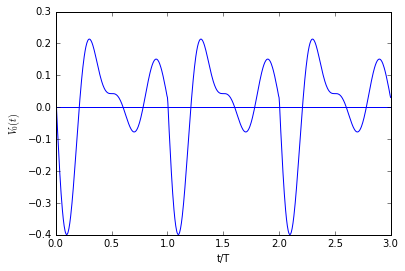

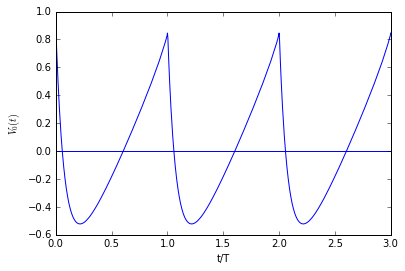

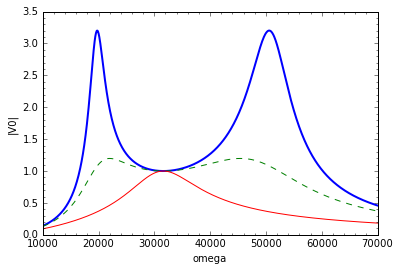

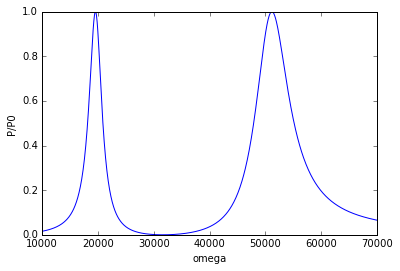

In [60]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, simplify
from sympy.solvers import solve
from sympy.functions import Abs,arg


print "\nElectrical Circuits\n"
vo = Symbol("vo")
vr = Symbol("vr")
ir = Symbol("ir")
ic = Symbol("ic")
il = Symbol("il")
r = Symbol("r")
omega = Symbol("omega")
c = Symbol("c")
l = Symbol("l")

eq1 = (vr + vo - 1, 
       ir - ic - il, 
       vr - ir*r,
       # what does 1j mean?
       ####ANSWER: 1*j means 1*(imaginary number, i)
       vo - ic/(1j*omega*c),
       # complete the following line:
       vo - 1j*il*omega*l)
# what does the following line do?
##### ANSWER: It solves the system of linear equations in eq1. It outputs the solutions to the equation: vo, vr, ir, ic, and il.
sol = solve(eq1, (vo, vr, ir, ic, il))
vos = simplify(sol[vo])
# compare the output of the following line if vos = sol[vo]
print vos
vosmod = sol[vo] #modified vos for testing the output
print vosmod



numvalue = {c: 10**-6, l: 10**-3}
# what does subs() do?
####ANSWER: It subsitutes the numerical values of the variables in its argument to the algebraic expression before the period in the syntax.
#### In this case, the numerical values of c and r were substituted to the algebraic expression vos which has the variables c and r in it.

# is vos.subs(c=10**-6, l=10**-3) allowed? Try it.
# is vos.subs(c=10**-6, l=10**-3) allowed? Try it.
###ANSWER: after modifying the code into
#vosnum = vos.subs(c: 10**-6, l: 10**-3)
#print vosnum
#and then running it, an error was encountered. 
#This is because the argument of subs() must strictly be enclosed in brackets{}




vosnum = vos.subs(numvalue)
flist = [vosnum.subs({r: 100.0*3**s}) for s in range(0, 4)]
omega_axis = np.linspace(20000, 43246, 100)
# what does 121 in the following line mean?
#####ANSWER: the first number is the number of rows of subplots, the second number is the number of columns of subplots,
#####and the third number is its order in plotting
# what are the other possible parameters of subplot()?
#####ANSWER:  *axisbg*: "The background color of the subplot, which can be any valid color specifier.
#       *polar*: "A boolean flag indicating whether the subplot plot should be
#         a polar projection.  Defaults to *False*."
#       *projection*: "A string giving the name of a custom projection to be used for the subplot."
plt.subplot(121)
# describe (python type, dimensions, etc) of the input parameter/s of zip() below
#####ANSWER: by checking the shape of [[abs(f.subs({omega: o})) for o in omega_axis] for f in flist],
###### it has been known to be a 4 by 100 array.
# what does zip(*a) do if a is a 2-D list or numpy array?
#####ANSWER: It outputs separated lists.
plt.plot(omega_axis, zip(*[[abs(f.subs({omega: o})) for o in omega_axis] 
                                                    for f in flist]))
plt.xlim(20000, 43246)
plt.ylim(0, 1)
plt.xlabel('omega')
plt.ylabel('Abs[vo]')
plt.xticks([20000, 30000, 40000])

plt.subplot(122)
# Replicate Fig. 2.6, right pane following the code for Fig. 2.6, left pane
plt.plot(omega_axis, zip(*[[arg(f.subs({omega: o})) for o in omega_axis] 
                                                    for f in flist]))


plt.show()




######################################

def vsaw(t, T=1.0): 
    # complete this function
    m = 2.0
    return m*(t-int(t))-1.0

#resonance frequency
omegares = 1./np.sqrt(np.prod(numvalue.values()))
ts = np.arange(256)/256.0
alist = [(1/np.sqrt(256)) * vsaw(t) for t in ts]
blist = np.sqrt(256) * np.fft.fft(alist)

def plot3(fac, w):
    # add a docstring for this function
    """Takes the Fourier transform of the input voltage (expanded in Fourier series) to  get the output voltage"""
    omegai = fac * omegares
    # How were the limits of arange() in the following line chosen?
    volist = np.concatenate(([complex(vosnum.subs({omega: omegai*s, r:
                                                   w}).evalf()) 
                                 for s in np.arange(1, 129)],
                             [0.0],
                             [complex(vosnum.subs({omega: omegai*s, r:
                                                   w}).evalf()) 
                                 for s in np.arange(-127, 0)]))
    vtrans = np.fft.ifft(blist * volist)
    plotlist = np.array([[(k+1)/256., vtrans[k%256]] for k in range(768)])
    plt.plot(plotlist[:,0], plotlist[:,1])
    # what does the following line do?
    #it adds up a horizontal line in the plot (in this case y = 0)
    plt.axhline(0)
    # add labels
    plt.xlabel('t/T')
    plt.ylabel('$V_0(t)$')
    plt.show()

plot3(1, 2700.0)
plot3(1/3., 200.0)
plot3(3.0, 5.0)

eq2 = (ir * (r + 1/(1j*omega*c) + 1j*omega*l) + vo - 1,
       ir - (1j*omega*c + 1/(1j*omega*l)) * vo)
sol2 = solve(eq2, (vo,ir))
vos2 = simplify(sol2[vo])
irs = simplify(sol2[ir])
irs = irs.subs(numvalue).subs({r:10.0})

flist3 = [Abs(vos2.subs(numvalue).subs({r: 10.0*3**s})) 
            for s in range(0, 3)]
omega_axis = np.linspace(10000, 70000, 1000)
lines = plt.plot(omega_axis, zip(*[[f.subs({omega: o}) for o in omega_axis] 
                                                     for f in flist3]))



# what does plt.setp() do?

#### ANSWER: It modifies the kind of line (dashed lines, ls='--') of lines[1] and modifies the thickness of the line for lines[0]
plt.setp(lines[0], lw=2)
plt.setp(lines[1], ls='--')
# add labels and ticks
plt.minorticks_on()

r = 10.0
# why should irs be passed to sympy.abs() before squaring?
####### ANSWER: Had this not been done, irs**2 will have an imaginary value
power = (r/2.0) *(Abs(irs)**2).evalf()

P = [power.subs({omega:o}) for o in omega_axis]

plt.xlabel('omega')
plt.ylabel('|V0|')
plt.show()

# replicate fig. 2.10
P0 = (1.0)**2/(2*r)
yvals = [P[i]/P0 for i in xrange(0,1000)]
plt.plot(omega_axis,yvals)
plt.xlabel('omega')
plt.ylabel('P/P0')
plt.show()

In [54]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, simplify
from sympy.solvers import solve
from sympy.functions import Abs,arg


print "\nElectrical Circuits\n"
vo = Symbol("vo")
vr = Symbol("vr")
ir = Symbol("ir")
ic = Symbol("ic")
il = Symbol("il")
r = Symbol("r")
omega = Symbol("omega")
c = Symbol("c")
l = Symbol("l")

eq1 = (vr + vo - 1, 
       ir - ic - il, 
       vr - ir*r,
       # what does 1j mean?
       ####ANSWER: 1*j means 1*(imaginary number, i)
       vo - ic/(1j*omega*c),
       # complete the following line:
       vo - 1j*il*omega*l)
# what does the following line do?
##### ANSWER: It solves the system of linear equations in eq1. It outputs the solutions to the equation: vo, vr, ir, ic, and il.
sol = solve(eq1, (vo, vr, ir, ic, il))
vos = simplify(sol[vo])
# compare the output of the following line if vos = sol[vo]
print vos
vosmod = sol[vo] #modified vos for testing the output
print vosmod



numvalue = {c: 10**-6, l: 10**-3}
# what does subs() do?
####ANSWER: It subsitutes the numerical values of the variables in its argument to the algebraic expression before the period in the syntax.
#### In this case, the numerical values of c and r were substituted to the algebraic expression vos which has the variables c and r in it.

# is vos.subs(c=10**-6, l=10**-3) allowed? Try it.
# is vos.subs(c=10**-6, l=10**-3) allowed? Try it.
###ANSWER: after modifying the code into
#vosnum = vos.subs(c: 10**-6, l: 10**-3)
#print vosnum
#and then running it, an error was encountered. 
#This is because the argument of subs() must strictly be enclosed in brackets{}




vosnum = vos.subs(numvalue)
flist = [vosnum.subs({r: 100.0*3**s}) for s in range(0, 4)]
omega_axis = np.linspace(20000, 43246, 100)
# what does 121 in the following line mean?
#####ANSWER: the first number is the number of rows of subplots, the second number is the number of columns of subplots,
#####and the third number is its order in plotting
# what are the other possible parameters of subplot()?
#####ANSWER:  *axisbg*: "The background color of the subplot, which can be any valid color specifier.
#       *polar*: "A boolean flag indicating whether the subplot plot should be
#         a polar projection.  Defaults to *False*."
# #       *projection*: "A string giving the name of a custom projection to be used for the subplot."
# plt.subplot(121)
# # describe (python type, dimensions, etc) of the input parameter/s of zip() below
# #####ANSWER: by checking the shape of [[abs(f.subs({omega: o})) for o in omega_axis] for f in flist],
# ###### it has been known to be a 4 by 100 array.
# # what does zip(*a) do if a is a 2-D list or numpy array?
# #####ANSWER: It outputs separated lists.
# plt.plot(omega_axis, zip(*[[abs(f.subs({omega: o})) for o in omega_axis] 
#                                                     for f in flist]))
# plt.xlim(20000, 43246)
# plt.ylim(0, 1)
# plt.xlabel('omega')
# plt.ylabel('Abs[vo]')
# plt.xticks([20000, 30000, 40000])

# plt.subplot(122)
# # Replicate Fig. 2.6, right pane following the code for Fig. 2.6, left pane
# plt.plot(omega_axis, zip(*[[arg(f.subs({omega: o})) for o in omega_axis] 
#                                                     for f in flist]))


# plt.show()




######################################

def vsaw(t, T=1.0): 
    # complete this function
    m = 2.0
    return m*(t-int(t))-1.0

#resonance frequency
omegares = 1./np.sqrt(np.prod(numvalue.values()))
ts = np.arange(256)/256.0
alist = [(1/np.sqrt(256)) * vsaw(t) for t in ts]
blist = np.sqrt(256) * np.fft.fft(alist)


omegas = np.fft.rfftfreq(1999)
# def plot3(fac, w):
#     # add a docstring for this function
#     """edit this"""
#     omegai = fac * omegares
#     # How were the limits of arange() in the following line chosen?
#     volist = np.concatenate(([complex(vosnum.subs({omega: omegai*s, r:
#                                                    w}).evalf()) 
#                                  for s in np.arange(1, 129)],
#                              [0.0],
#                              [complex(vosnum.subs({omega: omegai*s, r:
#                                                    w}).evalf()) 
#                                  for s in np.arange(-127, 0)]))
#     vtrans = np.fft.ifft(blist * volist)
#     plotlist = np.array([[(k+1)/256., vtrans[k%256]] for k in range(768)])
#     plt.plot(plotlist[:,0], plotlist[:,1])
#     # what does the following line do?
#     #it adds up a horizontal line in the plot (in this case y = 0)
#     plt.axhline(0)
#     # add labels
#     plt.xlabel('t/T')
#     plt.ylabel('$V_0(t)$')
#     plt.show()

# plot3(1, 2700.0)
# plot3(1/3., 200.0)
# plot3(3.0, 5.0)

eq2 = (ir * (r + 1/(1j*omega*c) + 1j*omega*l) + vo - 1,
       ir - (1j*omega*c + 1/(1j*omega*l)) * vo)
sol2 = solve(eq2, (vo,ir))
vos2 = simplify(sol2[vo])
irs = simplify(sol2[ir])
irs = irs.subs(numvalue).subs({r:10.0})
r = 10.0
# why should irs be passed to sympy.abs() before squaring?
power = (r/2.0) *(Abs(irs)**2).evalf()

# flist3 = [Abs(vos2.subs(numvalue).subs({r: 10.0*3**s})) 
#             for s in range(0, 3)]
omega_axis = np.linspace(10000, 70000, 1000)

P = [power.subs({omega:o}) for o in omega_axis]
# P0 = [((vsaw(t))**2)/(2.0*r) for t in omegas]

# lines = plt.plot(omega_axis, zip(*[[f.subs({omega: o}) for o in omega_axis] 
#                                                      for f in flist3]))
# # what does plt.setp() do?
# plt.setp(lines[0], lw=2)
# plt.setp(lines[1], ls='--')
# # add labels and ticks
# plt.minorticks_on()

# # line1, = plt.plot(omega_axis, [flist3[0].subs({omega: o}) for o in omega_axis], label = 't=0',linewidth=2.0)
# # line2, = plt.plot(omega_axis, [flist3[1].subs({omega: o}) for o in omega_axis], label = 't=0',linewidth=2.0)
# # line3, = plt.plot(omega_axis, [flist3[2].subs({omega: o}) for o in omega_axis], label = 't=0',linewidth=2.0)
# # plt.plot(omega_axis, zip(*[[f.subs({omega: o}) for o in omega_axis] 
# #                                                     for f in flist3]))
# plt.xlabel('omega')
# plt.ylabel('|V0|')
# plt.show()

# replicate fig. 2.10




Electrical Circuits

l*omega/(I*c*l*omega**2*r + l*omega - I*r)
l*omega/(I*c*l*omega**2*r + l*omega - I*r)


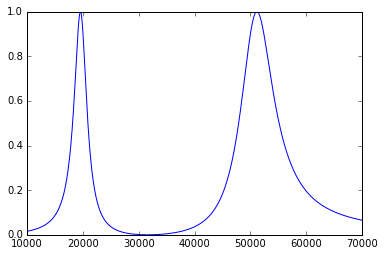

In [58]:
%matplotlib inline
# # plt.plot(omega_axis,yvals)
# # plt.show()
# print len(omega_axis)
# print (yvals)
